In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## load mock

In [4]:
from intrinsic_alignments.data.MB2_subfind_cat_utils import MBII_galaxy_catalog

catalog = MBII_galaxy_catalog(0.06)
Lbox = 100.0
dm_particle_mass = 1.1*10**7

for name in catalog.dtype.names:
    print(name)

ModuleNotFoundError: No module named 'intrinsic_alignments.data.MB2_subfind_cat_utils'

# examine mock galaxy catalog

In [5]:
print("number of galaxies: ", len(data))

# check centrals and satellite

centrals = (data['halos.central']==1)
satellites = (data['halos.central']==0)

print("satellite fraction: ", np.sum(satellites)/len(data))

# get index of central galaxy

from halotools.utils import calculate_first_idx_unique_array_vals, crossmatch

cen_inds = calculate_first_idx_unique_array_vals(data['groups.groupId'])
inds1, inds2 = crossmatch(data['groups.groupId'], data['groups.groupId'][cen_inds])

central_indices = cen_inds[inds2]

number of galaxies:  5377647
satellite fraction:  0.248546808669


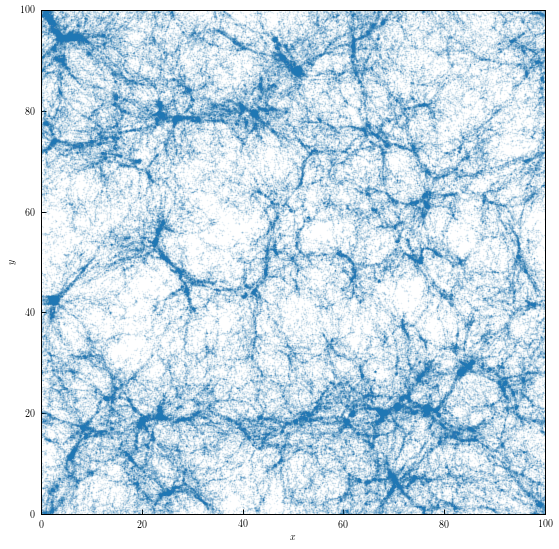

In [5]:
mask = data['halos.z']<10

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
plt.plot(data['halos.x'][mask], data['halos.y'][mask], '.', ms=1, alpha=0.1)
plt.xlim([0,Lbox])
plt.ylim([0,Lbox])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

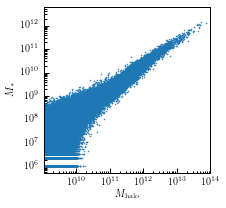

In [6]:
fig = plt.figure(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
plt.plot(data['halos.m_dm'][centrals], data['halos.m_star'][centrals], '.', ms=1)
plt.xscale('log')
plt.yscale('log')
plt.xlim([dm_particle_mass*100, 10**14])
plt.xlabel(r'$M_{\rm halo}$')
plt.ylabel(r'$M_{*}$')
plt.show()

# calculate some value added quantities

In [6]:
# get galaxy/halo coordinates in halotools format
coords = np.vstack((data['halos.x'],
                    data['halos.y'],
                    data['halos.z'])).T

# caclulate ellipticites and axis ratios
q_dm = data['shapesDM.q3d']
e_dm = (1.0-q_dm)/(1.0+q_dm**2)
s_dm = data['shapesDM.s3d']

q_gal = data['shapesStar.q3d']
e_gal = (1.0-q_gal)/(1.0+q_gal**2)
s_gal = data['shapesStar.s3d']

q_dm = data['shapesDM.q2d']
proj_e_dm = (1.0-q_dm)/(1.0+q_dm**2)

q_gal = data['shapesStar.q2d']
proj_e_gal = (1.0-q_gal)/(1.0+q_gal**2)

# calculate orientations
orientation_dm = np.vstack((data['shapesDM.a3d_x'],
                            data['shapesDM.a3d_y'],
                            data['shapesDM.a3d_z'])).T

orientation_gal = np.vstack((data['shapesStar.a3d_x'],
                             data['shapesStar.a3d_y'],
                             data['shapesStar.a3d_z'])).T

proj_orientation_dm = np.vstack((data['shapesDM.a2d_x'],
                                 data['shapesDM.a2d_y'])).T

proj_orientation_gal = np.vstack((data['shapesStar.a2d_x'],
                                  data['shapesStar.a2d_y'])).T

In [7]:
# satellite position orintations

x = (data['halos.x'] - data['halos.x'][central_indices])
y = (data['halos.y'] - data['halos.y'][central_indices])
z = (data['halos.z'] - data['halos.z'][central_indices])

cen_sat_direction = np.vstack((x,y,z)).T

In [8]:
N = len(data)
random_orientations = np.random.random((N,3))*2.0 - 1.0

random_proj_orientations = np.random.random((N,2))*2.0 - 1.0

# examine galaxy and halo shapes

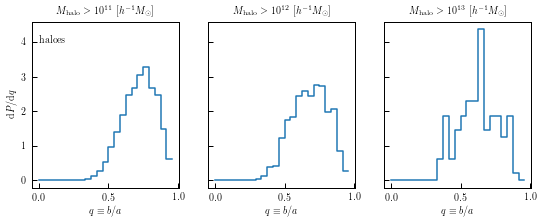

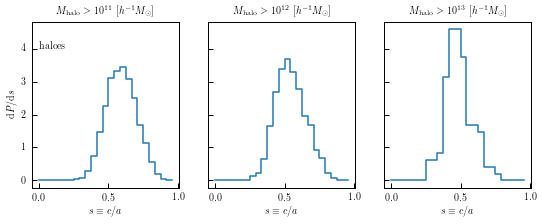

In [10]:
qbins = np.linspace(0,1,25)

mask = (data['halos.m_dm']>10**11)
counts_1 = np.histogram(q_dm[mask], bins=qbins)[0]
normalized_counts_1 = counts_1/np.sum(counts_1)/np.diff(qbins)

mask = (data['halos.m_dm']>10**12)
counts_2 = np.histogram(q_dm[mask], bins=qbins)[0]
normalized_counts_2 = counts_2/np.sum(counts_2)/np.diff(qbins)

mask = (data['halos.m_dm']>10**13)
counts_3 = np.histogram(q_dm[mask], bins=qbins)[0]
normalized_counts_3 = counts_3/np.sum(counts_3)/np.diff(qbins)

fig, axes = plt.subplots(1,3, sharey = True, figsize=(9.9,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax=axes[0]
ax.text(0,4,'haloes')
ax.set_title(r'$M_{\rm halo}>10^{11} ~[h^{-1}M_{\odot}]$')
ax.step(qbins[:-1], normalized_counts_1, '-')
ax.set_xlabel(r'$q\equiv b/a$')
ax.set_ylabel(r'$\mathrm{d}P/\mathrm{d}q$')
ax=axes[1]
ax.set_title(r'$M_{\rm halo}>10^{12} ~[h^{-1}M_{\odot}]$')
ax.step(qbins[:-1], normalized_counts_2, '-')
ax.set_xlabel(r'$q\equiv b/a$')
ax=axes[2]
ax.set_title(r'$M_{\rm halo}>10^{13} ~[h^{-1}M_{\odot}]$')
ax.step(qbins[:-1], normalized_counts_3, '-')
ax.set_xlabel(r'$q\equiv b/a$')

plt.show()


sbins = np.linspace(0,1,25)

mask = (data['halos.m_dm']>10**11)
counts_1 = np.histogram(s_dm[mask], bins=qbins)[0]
normalized_counts_1 = counts_1/np.sum(counts_1)/np.diff(sbins)

mask = (data['halos.m_dm']>10**12)
counts_2 = np.histogram(s_dm[mask], bins=qbins)[0]
normalized_counts_2 = counts_2/np.sum(counts_2)/np.diff(sbins)

mask = (data['halos.m_dm']>10**13)
counts_3 = np.histogram(s_dm[mask], bins=qbins)[0]
normalized_counts_3 = counts_3/np.sum(counts_3)/np.diff(sbins)

fig, axes = plt.subplots(1,3, sharey = True, figsize=(9.9,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax=axes[0]
ax.text(0,4,'haloes')
ax.set_title(r'$M_{\rm halo}>10^{11} ~[h^{-1}M_{\odot}]$')
ax.step(qbins[:-1], normalized_counts_1, '-')
ax.set_xlabel(r'$s\equiv c/a$')
ax.set_ylabel(r'$\mathrm{d}P/\mathrm{d}s$')
ax=axes[1]
ax.set_title(r'$M_{\rm halo}>10^{12} ~[h^{-1}M_{\odot}]$')
ax.step(qbins[:-1], normalized_counts_2, '-')
ax.set_xlabel(r'$s\equiv c/a$')
ax=axes[2]
ax.set_title(r'$M_{\rm halo}>10^{13} ~[h^{-1}M_{\odot}]$')
ax.step(qbins[:-1], normalized_counts_3, '-')
ax.set_xlabel(r'$s\equiv c/a$')

plt.show()

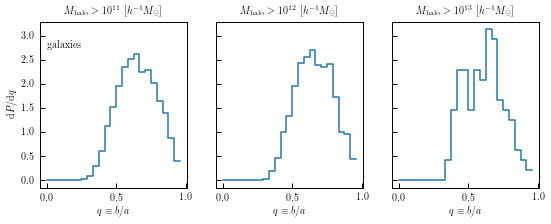

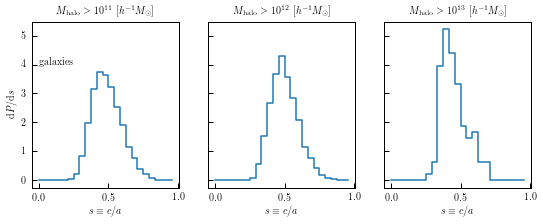

In [11]:
qbins = np.linspace(0,1,25)

mask = (data['halos.m_dm']>10**11)
counts_1 = np.histogram(q_gal[mask], bins=qbins)[0]
normalized_counts_1 = counts_1/np.sum(counts_1)/np.diff(qbins)

mask = (data['halos.m_dm']>10**12)
counts_2 = np.histogram(q_gal[mask], bins=qbins)[0]
normalized_counts_2 = counts_2/np.sum(counts_2)/np.diff(qbins)

mask = (data['halos.m_dm']>10**13)
counts_3 = np.histogram(q_gal[mask], bins=qbins)[0]
normalized_counts_3 = counts_3/np.sum(counts_3)/np.diff(qbins)

fig, axes = plt.subplots(1,3, sharey = True, figsize=(9.9,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax=axes[0]
ax.text(0,2.75,'galaxies')
ax.set_title(r'$M_{\rm halo}>10^{11} ~[h^{-1}M_{\odot}]$')
ax.step(qbins[:-1], normalized_counts_1, '-')
ax.set_xlabel(r'$q\equiv b/a$')
ax.set_ylabel(r'$\mathrm{d}P/\mathrm{d}q$')
ax=axes[1]
ax.set_title(r'$M_{\rm halo}>10^{12} ~[h^{-1}M_{\odot}]$')
ax.step(qbins[:-1], normalized_counts_2, '-')
ax.set_xlabel(r'$q\equiv b/a$')
ax=axes[2]
ax.set_title(r'$M_{\rm halo}>10^{13} ~[h^{-1}M_{\odot}]$')
ax.step(qbins[:-1], normalized_counts_3, '-')
ax.set_xlabel(r'$q\equiv b/a$')

plt.show()


sbins = np.linspace(0,1,25)

mask = (data['halos.m_dm']>10**11)
counts_1 = np.histogram(s_gal[mask], bins=qbins)[0]
normalized_counts_1 = counts_1/np.sum(counts_1)/np.diff(sbins)

mask = (data['halos.m_dm']>10**12)
counts_2 = np.histogram(s_gal[mask], bins=qbins)[0]
normalized_counts_2 = counts_2/np.sum(counts_2)/np.diff(sbins)

mask = (data['halos.m_dm']>10**13)
counts_3 = np.histogram(s_gal[mask], bins=qbins)[0]
normalized_counts_3 = counts_3/np.sum(counts_3)/np.diff(sbins)

fig, axes = plt.subplots(1,3, sharey = True, figsize=(9.9,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax=axes[0]
ax.text(0,4,'galaxies')
ax.set_title(r'$M_{\rm halo}>10^{11} ~[h^{-1}M_{\odot}]$')
ax.step(qbins[:-1], normalized_counts_1, '-')
ax.set_xlabel(r'$s\equiv c/a$')
ax.set_ylabel(r'$\mathrm{d}P/\mathrm{d}s$')
ax=axes[1]
ax.set_title(r'$M_{\rm halo}>10^{12} ~[h^{-1}M_{\odot}]$')
ax.step(qbins[:-1], normalized_counts_2, '-')
ax.set_xlabel(r'$s\equiv c/a$')
ax=axes[2]
ax.set_title(r'$M_{\rm halo}>10^{13} ~[h^{-1}M_{\odot}]$')
ax.step(qbins[:-1], normalized_counts_3, '-')
ax.set_xlabel(r'$s\equiv c/a$')

plt.show()

# calculate galaxy-halo misalignment angles

In [12]:
from halotools.utils import normalized_vectors, angles_between_list_of_vectors
from scipy.stats import powerlaw, beta

In [13]:
theta_misalignment = angles_between_list_of_vectors(orientation_dm[central_indices], orientation_gal)
cos_theta_misalignment = np.fabs(np.cos(theta_misalignment))
theta_misalignment = np.degrees(theta_misalignment)
theta_misalignment = np.nan_to_num(theta_misalignment)

reflect = (theta_misalignment > 90)
theta_misalignment[reflect] = 90 - (theta_misalignment[reflect]-90)

/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:88: RuntimeWarning: invalid value encountered in true_divide
  return vectors/elementwise_norm(vectors).reshape((npts, -1))
/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:130: RuntimeWarning: invalid value encountered in greater
  mask1 = (dot > 1) & (dot < 1 + tol)
/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:130: RuntimeWarning: invalid value encountered in less
  mask1 = (dot > 1) & (dot < 1 + tol)
/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:132: RuntimeWarning: invalid value encountered in less
  mask2 = (dot < -1) & (dot > -1 - tol)
/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:132: RuntimeWarning: invalid value encountered in greater
  mask2 = (dot < -1) & (dot > -1 - tol)


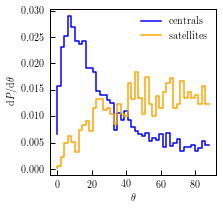

In [14]:
mask = (data['halos.m_star']>10**10) & centrals

theta_bins = np.linspace(0.0, 90, 45)
counts = np.histogram(theta_misalignment[mask], bins=theta_bins)[0]
normalized_counts_1 = counts/np.sum(counts)/np.diff(theta_bins)

mask = (data['halos.m_star']>10**10) & satellites

theta_bins = np.linspace(0.0, 90, 45)
counts = np.histogram(theta_misalignment[mask], bins=theta_bins)[0]
normalized_counts_2 = counts/np.sum(counts)/np.diff(theta_bins)


fig  = plt.figure(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
p1, = plt.step(theta_bins[:-1], normalized_counts_1, color='blue')
p2, = plt.step(theta_bins[:-1], normalized_counts_2, color='orange')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\mathrm{d}P/\mathrm{d}\theta$')
#plt.yscale('log')
#plt.ylim([0.001,0.03])
plt.legend([p1,p2], ['centrals', 'satellites'], frameon=False, fontsize=10, loc='upper right')
plt.show()

#fig.savefig('/Users/duncan/Desktop/MBII_misalignment_dist.png', dpi=300)

In [15]:
mask = (data['halos.m_star']>10**10) & centrals
a1 = powerlaw.fit(1-cos_theta_misalignment[mask], 0.2, fscale=1, floc=0)[0]
mask = (data['halos.m_star']>10**10) & satellites
a2 = powerlaw.fit(1-cos_theta_misalignment[mask], 0.2, fscale=1, floc=0)[0]

In [253]:
theta_misalignment = angles_between_list_of_vectors(cen_sat_direction, orientation_gal)
cos_theta_misalignment = np.cos(theta_misalignment)
theta_misalignment = np.degrees(theta_misalignment)
theta_misalignment = np.nan_to_num(theta_misalignment)

reflect = (theta_misalignment > 90)
theta_misalignment[reflect] = 90 - (theta_misalignment[reflect]-90)

# calculate halo-halo alginments

In [10]:
from halotools.mock_observables.alignments import ee_3d, ed_3d, gi_plus_projected, gi_minus_projected

In [20]:
rbins = np.logspace(-1,1, 20)
rbin_centers = (rbins[:-1] + rbins[1:])/2.0

mask = (data['halos.m_dm']>10**10) & centrals
print("number of haloes: ", np.sum(mask))

result_ee_1 = ee_3d(coords[mask], orientation_dm[mask], coords[mask], orientation_dm[mask], rbins, period=100.0)
result_ed_1 = ed_3d(coords[mask], orientation_dm[mask], coords[mask], rbins, period=100.0)

mask = (data['halos.m_dm']>10**11) & centrals
print("number of haloes: ", np.sum(mask))

result_ee_2 = ee_3d(coords[mask], orientation_dm[mask], coords[mask], orientation_dm[mask], rbins, period=100.0)
result_ed_2 = ed_3d(coords[mask], orientation_dm[mask], coords[mask], rbins, period=100.0)

mask = (data['halos.m_dm']>10**12) & centrals
print("number of haloes: ", np.sum(mask))

result_ee_3 = ee_3d(coords[mask], orientation_dm[mask], coords[mask], orientation_dm[mask], rbins, period=100.0)
result_ed_3 = ed_3d(coords[mask], orientation_dm[mask], coords[mask], rbins, period=100.0)

number of haloes:  202228
number of haloes:  21443
number of haloes:  1931


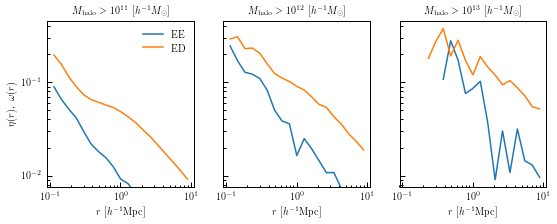

In [21]:
fig, axes = plt.subplots(1,3, sharex = True, sharey = True, figsize=(9.9,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax=axes[0]
ax.set_title(r'$M_{\rm halo}>10^{11} ~[h^{-1}M_{\odot}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$\eta(r),~\omega(r)$')
ax.set_xlabel(r'$r~[h^{-1}{\rm Mpc}]$')
l1, = ax.plot(rbin_centers, result_ee_1)
l2, = ax.plot(rbin_centers, result_ed_1)
ax.legend([l1,l2], ['EE','ED'], fontsize=10, frameon=False, loc='upper right')
ax=axes[1]
ax.set_title(r'$M_{\rm halo}>10^{12} ~[h^{-1}M_{\odot}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$r~[h^{-1}{\rm Mpc}]$')
l1, = ax.plot(rbin_centers, result_ee_2)
l2, = ax.plot(rbin_centers, result_ed_2)
ax=axes[2]
ax.set_title(r'$M_{\rm halo}>10^{13} ~[h^{-1}M_{\odot}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$r~[h^{-1}{\rm Mpc}]$')
l1, = ax.plot(rbin_centers, result_ee_3)
l2, = ax.plot(rbin_centers, result_ed_3)

plt.show()

In [19]:
rp_bins = np.logspace(-1,1, 20)
rp_bin_centers = (rp_bins[:-1] + rp_bins[1:])/2.0

pi_max=30.0

mask = (data['halos.m_dm']>10**10)
print("number of haloes: ", np.sum(mask))

result_plus_1 = gi_plus_projected(coords[mask], proj_orientation_dm[mask], proj_e_dm[mask], coords[mask],
                                rp_bins, pi_max=pi_max, period=100.0, num_threads=4)
result_minus_1 = gi_minus_projected(coords[mask], proj_orientation_dm[mask], proj_e_dm[mask], coords[mask],
                                rp_bins, pi_max=pi_max, period=100.0, num_threads=4)

mask = (data['halos.m_dm']>10**11)
print("number of haloes: ", np.sum(mask))

result_plus_2 = gi_plus_projected(coords[mask], proj_orientation_dm[mask], proj_e_dm[mask], coords[mask],
                                rp_bins, pi_max=pi_max, period=100.0, num_threads=4)
result_minus_2 = gi_minus_projected(coords[mask], proj_orientation_dm[mask], proj_e_dm[mask], coords[mask],
                                rp_bins, pi_max=pi_max, period=100.0, num_threads=4)

mask = (data['halos.m_dm']>10**12)
print("number of haloes: ", np.sum(mask))

result_plus_3 = gi_plus_projected(coords[mask], proj_orientation_dm[mask], proj_e_dm[mask], coords[mask],
                                rp_bins, pi_max=pi_max, period=100.0, num_threads=4)
result_minus_3 = gi_minus_projected(coords[mask], proj_orientation_dm[mask], proj_e_dm[mask], coords[mask],
                                rp_bins, pi_max=pi_max, period=100.0, num_threads=4)

number of haloes:  202228
number of haloes:  21443
number of haloes:  1931


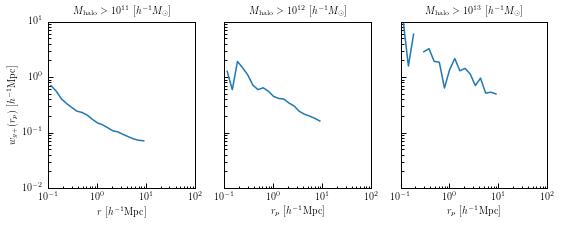

In [21]:
fig, axes = plt.subplots(1,3, sharex = True, sharey = True, figsize=(9.9,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)

ax=axes[0]
ax.set_title(r'$M_{\rm halo}>10^{11} ~[h^{-1}M_{\odot}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$w_{g+}(r_p)~[h^{-1}{\rm Mpc}]$')
ax.set_xlabel(r'$r~[h^{-1}{\rm Mpc}]$')
l1, = ax.plot(rp_bin_centers, result_plus_1, '-')

ax=axes[1]
ax.set_title(r'$M_{\rm halo}>10^{12} ~[h^{-1}M_{\odot}]$')
ax.set_xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
l1, = ax.plot(rp_bin_centers, result_plus_2, '-')

ax=axes[2]
ax.set_title(r'$M_{\rm halo}>10^{13} ~[h^{-1}M_{\odot}]$')
ax.set_xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
l1, = ax.plot(rp_bin_centers, result_plus_3, '-')

ax.set_ylim([0.01,10])
ax.set_xlim([0.1,100])

plt.show()

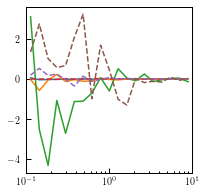

In [17]:
fig  = plt.figure(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
l1, = plt.plot(rp_bin_centers, result_minus_1, '-')
l2, = plt.plot(rp_bin_centers, result_minus_2, '-')
l3, = plt.plot(rp_bin_centers, result_minus_3, '-')
l1, = plt.plot(rp_bin_centers, result_minus_1r, '--')
l2, = plt.plot(rp_bin_centers, result_minus_2r, '--')
l3, = plt.plot(rp_bin_centers, result_minus_3r, '--')
plt.plot([0,100], [0,0], '--', color='grey')
plt.xscale('log')
#plt.ylabel(r'$$w_{g-}$')
#plt.xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
plt.xlim([0.1,10])
#plt.ylim([-20,20])
plt.show()

## calculate galaxy-galaxy alignments

In [10]:
from halotools.mock_observables.alignments import ee_3d, ed_3d, gi_plus_projected, gi_minus_projected

In [11]:
rbins = np.logspace(-1,1, 20)
rbin_centers = (rbins[:-1] + rbins[1:])/2.0

mask = (data['halos.m_dm']>10**11)
print("number of haloes: ", np.sum(mask))

result_ee_1 = ee_3d(coords[mask], orientation_gal[mask], coords[mask], orientation_gal[mask], rbins, period=100.0)
result_ed_1 = ed_3d(coords[mask], orientation_gal[mask], coords[mask], rbins, period=100.0)

mask = (data['halos.m_dm']>10**12)
print("number of haloes: ", np.sum(mask))

result_ee_2 = ee_3d(coords[mask], orientation_gal[mask], coords[mask], orientation_gal[mask], rbins, period=100.0)
result_ed_2 = ed_3d(coords[mask], orientation_gal[mask], coords[mask], rbins, period=100.0)

mask = (data['halos.m_dm']>10**13)
print("number of haloes: ", np.sum(mask))

result_ee_3 = ee_3d(coords[mask], orientation_gal[mask], coords[mask], orientation_gal[mask], rbins, period=100.0)
result_ed_3 = ed_3d(coords[mask], orientation_gal[mask], coords[mask], rbins, period=100.0)

number of haloes:  21443
number of haloes:  1931
number of haloes:  115


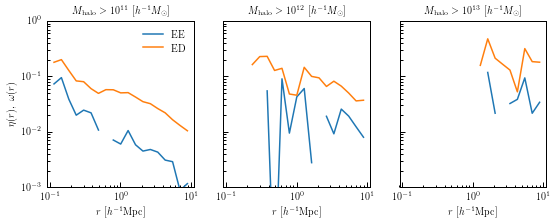

In [12]:
fig, axes = plt.subplots(1,3, sharex = True, sharey = True, figsize=(9.9,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax=axes[0]
ax.set_title(r'$M_{\rm halo}>10^{11} ~[h^{-1}M_{\odot}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$\eta(r),~\omega(r)$')
ax.set_xlabel(r'$r~[h^{-1}{\rm Mpc}]$')
l1, = ax.plot(rbin_centers, result_ee_1)
l2, = ax.plot(rbin_centers, result_ed_1)
ax.legend([l1,l2], ['EE','ED'], fontsize=10, frameon=False, loc='upper right')
ax=axes[1]
ax.set_title(r'$M_{\rm halo}>10^{12} ~[h^{-1}M_{\odot}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$r~[h^{-1}{\rm Mpc}]$')
l1, = ax.plot(rbin_centers, result_ee_2)
l2, = ax.plot(rbin_centers, result_ed_2)
ax=axes[2]
ax.set_title(r'$M_{\rm halo}>10^{13} ~[h^{-1}M_{\odot}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$r~[h^{-1}{\rm Mpc}]$')
l1, = ax.plot(rbin_centers, result_ee_3)
l2, = ax.plot(rbin_centers, result_ed_3)

ax.set_ylim([0.001,1])

plt.show()

In [49]:
rp_bins = np.logspace(-1,1, 20)
rp_bin_centers = (rp_bins[:-1] + rp_bins[1:])/2.0

pi_max=30.0

mask = (data['halos.m_dm']>10**11.0)
print("number of haloes: ", np.sum(mask))

result_plus_1 = gi_plus_projected(coords[mask], proj_orientation_gal[mask], proj_e_gal[mask], coords[mask],
                                rp_bins, pi_max=pi_max, period=100.0)
result_minus_1 = gi_minus_projected(coords[mask], proj_orientation_gal[mask], proj_e_gal[mask], coords[mask],
                                rp_bins, pi_max=pi_max, period=100.0)

mask = (data['halos.m_dm']>10**12.0)
print("number of haloes: ", np.sum(mask))

result_plus_2 = gi_plus_projected(coords[mask], proj_orientation_gal[mask], proj_e_gal[mask], coords[mask],
                                rp_bins, pi_max=pi_max, period=100.0)
result_minus_2 = gi_minus_projected(coords[mask], proj_orientation_gal[mask], proj_e_gal[mask], coords[mask],
                                rp_bins, pi_max=pi_max, period=100.0)

mask = (data['halos.m_dm']>10**13.0)
print("number of haloes: ", np.sum(mask))

result_plus_3 = gi_plus_projected(coords[mask], proj_orientation_gal[mask], proj_e_gal[mask], coords[mask],
                                rp_bins, pi_max=pi_max, period=100.0)
result_minus_3 = gi_minus_projected(coords[mask], proj_orientation_gal[mask], proj_e_gal[mask], coords[mask],
                                rp_bins, pi_max=pi_max, period=100.0)

number of haloes:  21443
number of haloes:  1931
number of haloes:  115


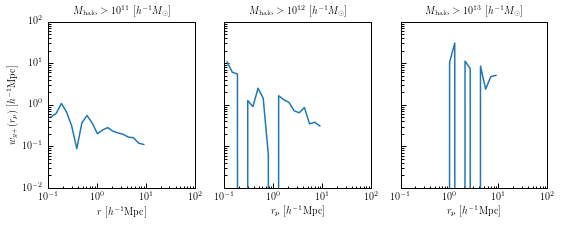

In [50]:
fig, axes = plt.subplots(1,3, sharex = True, sharey = True, figsize=(9.9,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)

ax=axes[0]
ax.set_title(r'$M_{\rm halo}>10^{11} ~[h^{-1}M_{\odot}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$w_{g+}(r_p)~[h^{-1}{\rm Mpc}]$')
ax.set_xlabel(r'$r~[h^{-1}{\rm Mpc}]$')
l1, = ax.plot(rp_bin_centers, result_plus_1, '-')

ax=axes[1]
ax.set_title(r'$M_{\rm halo}>10^{12} ~[h^{-1}M_{\odot}]$')
ax.set_xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
l1, = ax.plot(rp_bin_centers, result_plus_2, '-')

ax=axes[2]
ax.set_title(r'$M_{\rm halo}>10^{13} ~[h^{-1}M_{\odot}]$')
ax.set_xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
l1, = ax.plot(rp_bin_centers, result_plus_3, '-')

ax.set_ylim([0.01,100])
ax.set_xlim([0.1,100])

plt.show()

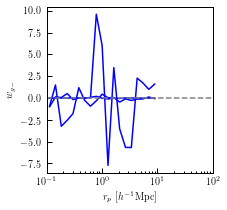

In [51]:
fig  = plt.figure(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
l1, = plt.plot(rp_bin_centers, result_minus_1, '-', color='blue')
l2, = plt.plot(rp_bin_centers, result_minus_2, '-', color='blue')
l3, = plt.plot(rp_bin_centers, result_minus_3, '-', color='blue')
plt.plot([0,100], [0,0], '--', color='grey')
plt.xscale('log')
plt.ylabel(r'$$w_{g-}$')
plt.xlabel(r'$r_p~[h^{-1}{\rm Mpc}]$')
plt.xlim([0.1,100])
plt.show()